# Coding project - Picture enhancement

The goal of that set of filters was to produce an image with a high contrast, but without too many details like granularity of the road.

First a median filter has been applied followed by morphological operations opening and closing. The median filter is used to remove some details without decrease the edges is applied on the 3 components of the RGB image.

Then the image is converted into a HSV image in order to apply the morphological operations on the last component. Opening and closing were used to remove more details of the image. 


Finally, the contrast is increased by doing a histogram equalization. The histogram equalization is done by using "equalize_hist" from skimage.exposure on the 3 channels.


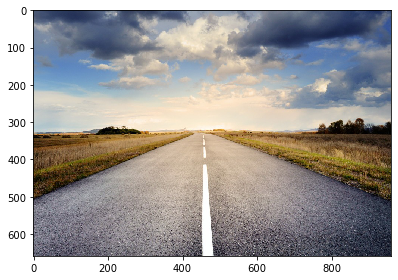

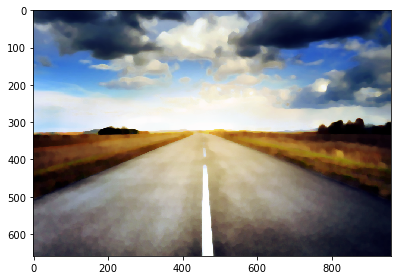

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread, imshow
from skimage.color import rgb2hsv,hsv2rgb
from skimage.filters.rank import median
from skimage.morphology import disk, opening,closing
from skimage.exposure import equalize_hist


form = disk(5)
image1 = imread("road.jpg")


plt.figure()
imshow(image1)
plt.show()

#Median filter

image1[:,:,0] = median(image1[:,:,0], form)
image1[:,:,1] = median(image1[:,:,1], form)
image1[:,:,2] = median(image1[:,:,2], form)

#rgb2hsv
image2 = rgb2hsv(image1)

#Morpho Op
image2[:,:,2] = closing(opening(image2[:,:,2],form),form)

#hsv2rgb
image3 = hsv2rgb(image2)

#hist equ
image3[:,:,0] = equalize_hist(image3[:,:,0])
image3[:,:,1] = equalize_hist(image3[:,:,1])
image3[:,:,2] = equalize_hist(image3[:,:,2])

plt.figure()
imshow(image3)
plt.show()
